# DATA SCIENCE
##       Group 5

### Features that directly infect diabetes

In [1]:
#Importing all the required libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import joblib

In [2]:
#Reading dataframes
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
1,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
2,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
3,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
4,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0


In [3]:
# Checkinf=g all the details for the dataframe
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   394 non-null    float64
 1   BloodPressure             394 non-null    float64
 2   SkinThickness             394 non-null    float64
 3   Insulin                   394 non-null    float64
 4   BMI                       394 non-null    float64
 5   DiabetesPedigreeFunction  394 non-null    float64
 6   Age                       394 non-null    float64
 7   Outcome                   394 non-null    float64
dtypes: float64(8)
memory usage: 43.0 KB


In [6]:
#Checking total null values
diabetesDF.isna().sum()

Glucose                     292
BloodPressure               292
SkinThickness               292
Insulin                     292
BMI                         292
DiabetesPedigreeFunction    292
Age                         292
Outcome                     292
dtype: int64

In [7]:
# Removing null values
diabetesDF = diabetesDF.dropna(how='any',axis=0)
diabetesDF.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Data Exploration

In [14]:
diabetesDF.dtypes

Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [15]:
diabetesDF.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.203356,0.203526,0.580010,0.208711,0.140409,0.346041,0.512201
BloodPressure,0.203356,1.000000,0.232342,0.098272,0.301530,-0.020834,0.299845,0.192819
SkinThickness,0.203526,0.232342,1.000000,0.184888,0.653425,0.154056,0.170694,0.257854
Insulin,0.580010,0.098272,0.184888,1.000000,0.228328,0.130395,0.220261,0.303454
BMI,0.208711,0.301530,0.653425,0.228328,1.000000,0.112954,0.080778,0.271796
DiabetesPedigreeFunction,0.140409,-0.020834,0.154056,0.130395,0.112954,1.000000,0.076609,0.200759
Age,0.346041,0.299845,0.170694,0.220261,0.080778,0.076609,1.000000,0.352982
Outcome,0.512201,0.192819,0.257854,0.303454,0.271796,0.200759,0.352982,1.000000


<AxesSubplot:>

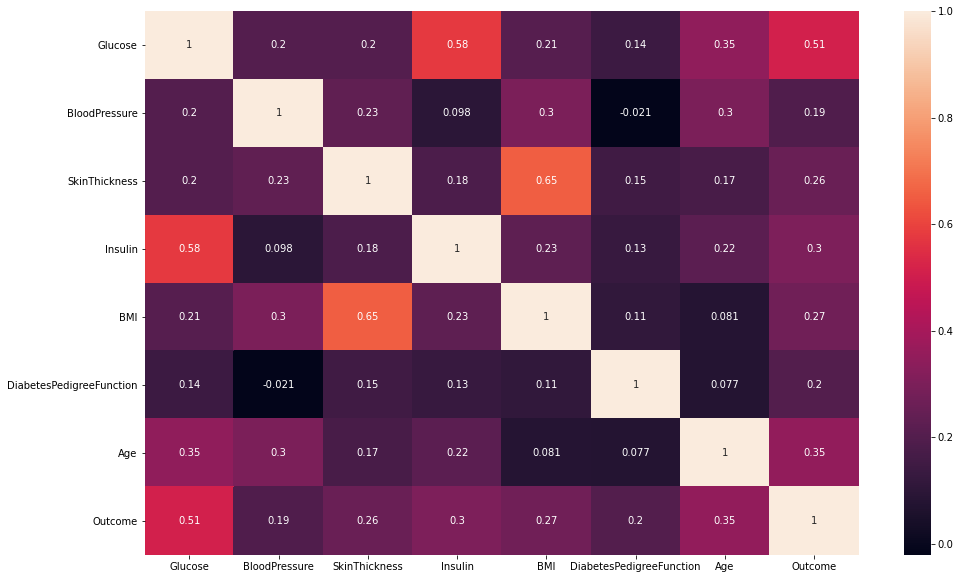

In [34]:
# Plotting a heat map for the correlations
plt.figure(figsize=(16,10))
sns.heatmap(diabetesDF.corr(), annot=True)

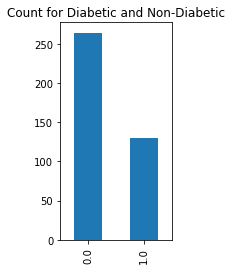

In [17]:
# Bar Plot showing number of dibaetic vs non-diabetic (0 representing non-diabetic and 1 representing diabetic)
ax = diabetesDF['Outcome'].value_counts().plot(kind='bar',figsize=(2,4),title="Count for Diabetic vs Non-Diabetic")

##### Training and Testing data to make predictions

In [18]:
# Splitting the dataframe for training, testing and checking
dfTrain = diabetesDF[:342]
dfTest = diabetesDF[342:380]
dfCheck = diabetesDF[380:]

In [19]:
# Separating the Outcome varible from training and testing data and storing them as arrays
trainActual = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testActual = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [20]:
#Calculating means, standard deviations
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [22]:
# Applying Logistic Regression for creating the model
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainActual)

LogisticRegression()

In [23]:
# Checking accuracy for the model using test data
accuracy = diabetesCheck.score(testData, testActual)
print("accuracy = ", accuracy * 100, "%")

accuracy =  81.57894736842105 %


Text(0.5, 0, 'Importance')

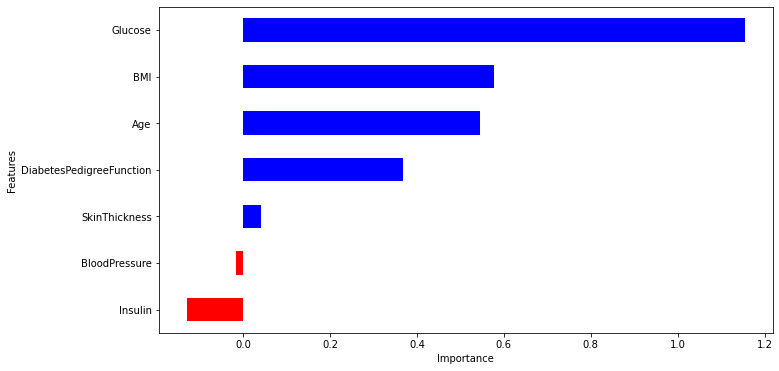

In [35]:
# Creating a horizontal bar plot for importance of variables
coeff = list(diabetesCheck.coef_[0]) # coeff stores the values of coefficienct for all the variables
labels = list(dfTrain.drop('Outcome',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Observations from the plot

##### Glucose level, BMI, Age and Diabetes Pedigree Function have significant influence on the model, since their coefficient value is high.

##### Skin Thickness, Blood Pressure and Insulin have relatively low influence on the model, since their coefficient value is low.

##### The blue bars indicate positive value of coefficient whereas the red bars indicate negative value of coefficient, where positive indicates that the variable is directly proportional to the outcome and negative indicates that the variable is indirectly proportional to the outcome.

##### Insulin is more important of a feature than Skin Thickness, because the magnitude of coefficient is higher(the negative only indicates proportionality not impact).

##### So, as a conclusion we can say that features that directly infect diabetes are Glucose, BMI, Age and Diabetes Pedigree Function.


## -

## -


##### Saving the trained model and checking it with our check data

In [36]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [30]:
#Loading the saved model checking accuracy of the model
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testActual)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  81.57894736842105 %


In [31]:
dfCheck

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
658,99.0,60.0,17.0,160.0,36.6,0.453,21.0,0.0
660,120.0,80.0,37.0,150.0,42.3,0.785,48.0,1.0
661,102.0,44.0,20.0,94.0,30.8,0.400,26.0,0.0
662,109.0,58.0,18.0,116.0,28.5,0.219,22.0,0.0
664,153.0,88.0,37.0,140.0,40.6,1.174,39.0,0.0
665,100.0,84.0,33.0,105.0,30.0,0.488,46.0,0.0
667,81.0,74.0,41.0,57.0,46.3,1.096,32.0,0.0
668,187.0,70.0,22.0,200.0,36.4,0.408,36.0,1.0
671,121.0,78.0,39.0,74.0,39.0,0.261,28.0,0.0
673,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1.0


In [33]:
sampleData = dfCheck
# Prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# Predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('\nPrediction:', prediction)

Probability: [[0.89638234 0.10361766]
 [0.28743314 0.71256686]
 [0.89941946 0.10058054]
 [0.92871977 0.07128023]
 [0.13017233 0.86982767]
 [0.76548454 0.23451546]
 [0.64853325 0.35146675]
 [0.14644338 0.85355662]
 [0.69690273 0.30309727]
 [0.25132841 0.74867159]
 [0.38387721 0.61612279]
 [0.93348373 0.06651627]
 [0.58575211 0.41424789]
 [0.86428967 0.13571033]]

Prediction: [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(dfCheck['Outcome'], prediction)
rmse = sqrt(mse)
print(rmse)

0.2672612419124244


##### It can be easily observed that our model is working good and predicting whether a person is diabetic or not with a good accuracy (81.57894736842105 %) and low error (rmse = 0.2672612419124244).

##### A low RMSE value indicates that the model is a good fit.
